In [1]:
import pandas as pd
import string
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import copy
import requests as r
import seaborn as sns
%matplotlib inline

#Need to add the following special charactesr to the list of puncuations: ~‘êàé—’”“
string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'

In [2]:
# Pride and Prejudice by Jane Austen (https://dev.gutenberg.org/ebooks/1342)
url = 'https://dev.gutenberg.org/files/1342/1342-0.txt'
data = r.get(url)
f = data.text
remove_bom = f.replace('\ufeff', '###')
comma_delimit = remove_bom.replace('\n', ',').strip().lower().replace('\r', '').split(',') 
clean_text = [each for each in comma_delimit if (str.rstrip(each) != '') or (str.rstrip(each) not in string_punctuation)]
df = pd.DataFrame({'text': clean_text})

In [3]:
def clean(s):
    '''
    Remove punctuation, numeric values and all extra spaces from string. 
    '''
    # remove punctuation
    no_punc = s.translate(str.maketrans('', '', string_punctuation))
    # remove num
    no_num = ''.join([each for each in no_punc if not each.isdigit()])
    # remove extra spaces
    return ' '.join(no_num.split())

def count_alpha(x):
    return Counter(x)

In [4]:
def count(s):
    count_a = s.count('a')
    count_b = s.count('b')
    count_c = s.count('c')
    count_d = s.count('d')
    count_e = s.count('e')
    count_f = s.count('f')
    count_g = s.count('g')
    count_h = s.count('h')
    count_i = s.count('i')
    count_j = s.count('j')
    count_k = s.count('k')
    count_l = s.count('l')
    count_m = s.count('m')
    count_n = s.count('n')
    count_o = s.count('o')
    count_p = s.count('p')
    count_q = s.count('q')
    count_r = s.count('r')
    count_s = s.count('s')
    count_t = s.count('t')
    count_u = s.count('u')
    count_v = s.count('v')
    count_w = s.count('w')
    count_x = s.count('x')
    count_y = s.count('y')
    count_z = s.count('z')
    count_space = s.count(' ')
    
    return {'a': count_a,
            'b': count_b,
            'c': count_c,
            'd': count_d,
            'e': count_e,
            'f': count_f,
            'g': count_g,
            'h': count_h,
            'i': count_i,
            'j': count_j,
            'k': count_k,
            'l': count_l,
            'm': count_m,
            'n': count_n,
            'o': count_o,
            'p': count_p,
            'q': count_q,
            'r': count_r,
            's': count_s,
            't': count_t,
            'u': count_u,
            'v': count_v,
            'w': count_w,
            'x': count_x,
            'y': count_y,
            'z': count_z,
            'space': count_space}

In [5]:
df_clean = copy.deepcopy(df)
df_clean.loc[:, 'clean_string'] = df_clean['text'].apply(clean)
df_clean.replace('', np.nan, inplace=True)
df_clean.describe()

,text,clean_string
count,20805,20782
unique,18817,18197
top,and,and
freq,177,191


In [6]:
df_clean = df_clean[~df_clean['clean_string'].isna()]
df_clean.describe()

,text,clean_string
count,20782,20782
unique,18810,18197
top,and,and
freq,177,191


In [7]:
df_clean.loc[:, 'clean_string_count'] = df_clean['clean_string'].apply(count_alpha)
df_clean.loc[:, 'clean_string_count_py'] = df_clean['clean_string'].apply(count)

list_dict = [dict(each) for each in df_clean.clean_string_count.tolist()]
final_dist = {}
for d in list_dict:
    for k in d.keys():
        final_dist[k] = final_dist.get(k, 0) + d[k]

list_dict_py = [dict(each) for each in df_clean.clean_string_count_py.tolist()]
final_dist_py = {}
for d in list_dict_py:
    for k in d.keys():
        final_dist_py[k] = final_dist_py.get(k, 0) + d[k]

In [8]:
df_freq = pd.DataFrame(final_dist.items(), columns=['letter', 'count'])
df_freq['freq'] = df_freq['count'] / df_freq['count'].sum()
df_freq.at[3, 'letter'] = 'space'
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.reset_index(drop=True, inplace=True)
df_freq['rank'] = df_freq.index + 1
df_freq

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


In [9]:
df_freq_py = pd.DataFrame(final_dist_py.items(), columns=['letter', 'count'])
df_freq_py['freq'] = df_freq_py['count'] / df_freq_py['count'].sum()
df_freq_py.at[3, 'letter'] = 'space'
df_freq_py.sort_values(by='count', ascending=False, inplace=True)
df_freq_py.reset_index(drop=True, inplace=True)
df_freq_py['rank'] = df_freq_py.index + 1
df_freq_py

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


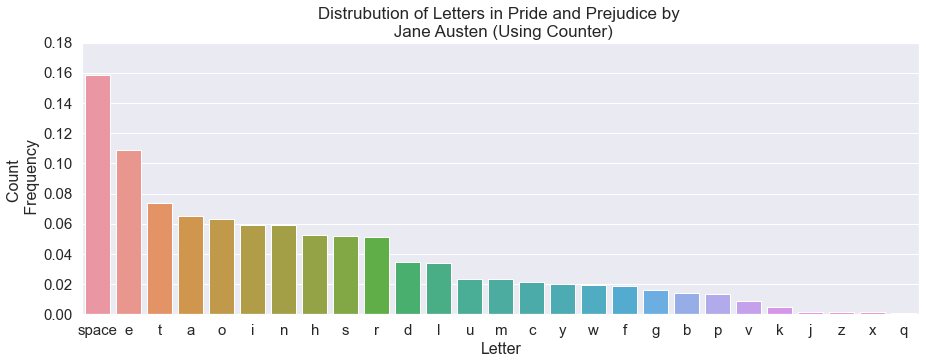

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='letter', y='freq', data=df_freq)
plt.ylabel('Count \n Frequency', fontsize=16)
plt.xlabel('Letter', fontsize=16)
plt.ylim(0, 0.180, 0.025)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Counter)', fontsize=17)
plt.show()

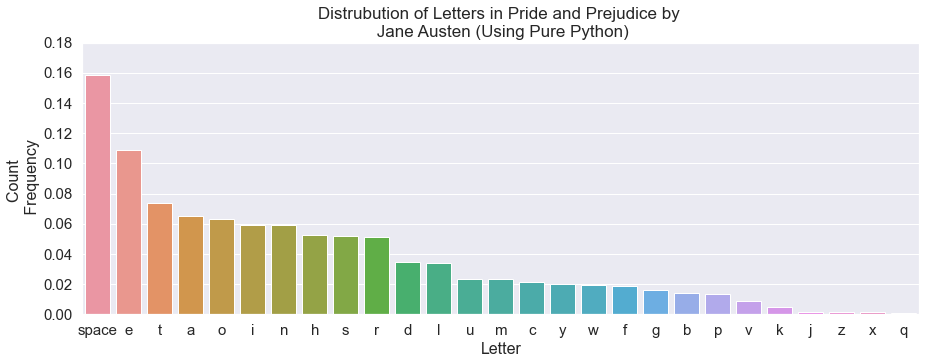

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='letter', y='freq', data=df_freq)
plt.ylabel('Count \n Frequency', fontsize=16)
plt.xlabel('Letter', fontsize=16)
plt.ylim(0, 0.180, 0.025)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Pure Python)', fontsize=17)
plt.show()